---
# Estornos - Maio 2022
---

Notebook para analisar os estornos mensais do hotel Slaviero Essential Curitiba Shopping. As variáveis em análise são:

* **Valor**: valor, em reais, do que foi estornado (crédito ou débito);
* **Data**: período dia/mês/ano em que o estorno foi realizado;
* **Hora**: em qual horário do dia o estorno foi realizado. Utiliza-se o padrão de 12 horas;
* **Usuário**: qual funcionário do SUCT realizou o estorno;
* **Motivo**: jusiticativa do estorno.


## 1. Importações


---



### 1.1 Bibliotecas

In [25]:
import pandas as pd

In [26]:
import matplotlib.pyplot as plt

In [27]:
!pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.2 Bases de Dados

In [28]:
dataset = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Dados/Estornos/estornos_maio.csv')
dataset.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo
0,107.0,57429723.0,-293.00,5/1/2022,10:04:21 AM,RFELIZ,1,ERRO DO SISTEMA
1,208.0,57825777.0,32.25,5/1/2022,1:48:40 AM,RFELIZ,1,ERRO DE LANÇAMENTO
2,510.0,57813205.0,-196.79,5/1/2022,12:14:57 PM,RFELIZ,1,ERRO DE LANÇAMENTO
3,502.0,57837422.0,-196.24,5/1/2022,11:24:00 PM,RFELIZ,1,ERRO DE LANÇAMENTO
4,510.0,57813205.0,-30.00,5/1/2022,12:13:47 PM,RFELIZ,1,ERRO DE LANÇAMENTO


## 2. Tratamento de Dados


---



### 2.1 Compreendendo os tipos de dados

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UH       584 non-null    float64
 1   Reserva  592 non-null    float64
 2   Valor    624 non-null    float64
 3   Data     624 non-null    object 
 4   Hora     624 non-null    object 
 5   Usuário  624 non-null    object 
 6   Qtde     624 non-null    int64  
 7   Motivo   624 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 39.1+ KB


## 2.2 Alterando os nomes das colunas

In [30]:
new_columns = {
    'UH': 'UH',	
    'Reserva': 'reserva',
    'Descrição': 'descricao',
    'Crédito': 'credito',
    'Débito': 'debito',
    'Valor': 'valor',
    'Data': 'data',
    'Hora': 'hora',
    'Usuário': 'usuario',
    'Qtde.': 'quantidade',
    'Motivo': 'motivo'
}

dataset.rename(columns = new_columns, inplace = True)

## 3. Funções e variáveis padronizados

In [135]:
palette = ['#100c30', '#1D1552', '#302E87', '#3A5BA6', '#4083B8', '#40A4B8', '#52B8B0', '#63B898']

In [136]:
# Definições utilizadas em todos os gráficos

def plot_config():
  sns.set_style('darkgrid')
  plt.figure(figsize=(15, 5))

In [140]:
''' Função para criação de gráficos de barra
- x:
- y:
- xlabel:
- ylabel:
- title: 
'''

def set_barplot(x, y, data, xlabel, ylabel, title, palette=palette, hue=None):

  plot_config()
  ax = sns.barplot(x=x, y=y, palette=palette, data=data, hue=hue)
  ax.set_title(title, fontsize = 18)
  ax.set_xlabel(xlabel, fontsize = 12)
  ax.set_ylabel(ylabel, fontsize = 12)

  ax

In [138]:
''' Função para geração de gráficos de curva
- x:
- y:
- xlabel:
- ylabel:
- title: 
'''

def set_lineplot(x, y, xlabel, ylabel, title):
  plot_config()
  ax = sns.lineplot(x=x, y=y)
  ax.set_title(title, fontsize = 18)
  ax.set_xlabel(xlabel, fontsize = 12)
  ax.set_ylabel(ylabel, fontsize = 12)

  ax

## 4. Análise de Dados

### 4.1 Quantidade de estornos por usuário

In [35]:
frequency = dataset.usuario.value_counts()
users = dataset.usuario.unique()

users_frequency = pd.DataFrame({'estornos': frequency})
users_frequency.rename_axis('usuarios', axis = 'columns', inplace = True)
users_frequency

usuarios,estornos
RFELIZ,173
CALOLIVEIRA,127
RFREITAS,100
ECSOUSA,65
LPADOVINO,57
IGPESSOA,51
CFIOR,30
ANLGONCALVES,21


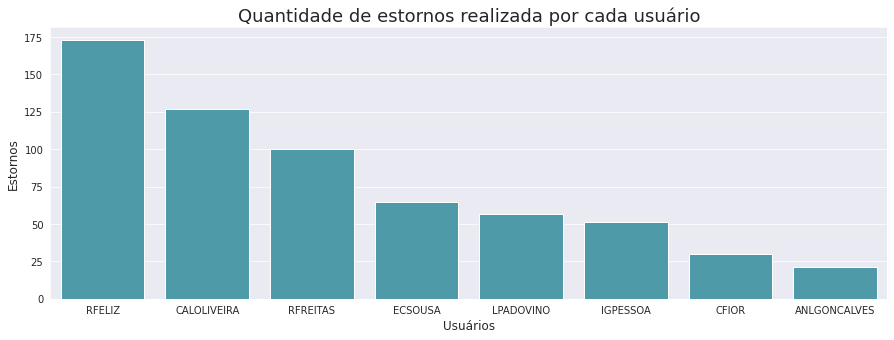

In [145]:
graphic = set_barplot(x=users_frequency.index, y='estornos', data = users_frequency, 
                      xlabel = 'Usuários', ylabel ='Estornos', 
                      title = 'Quantidade de estornos realizada por cada usuário',
                      palette = [palette[5]])
graphic

### 4.2 Quantidade de estornos diários

In [146]:
estornos_por_dia = pd.value_counts(dataset.data)
dias = []
for i in dataset.data.unique():
  dias.append(i[2:-5])

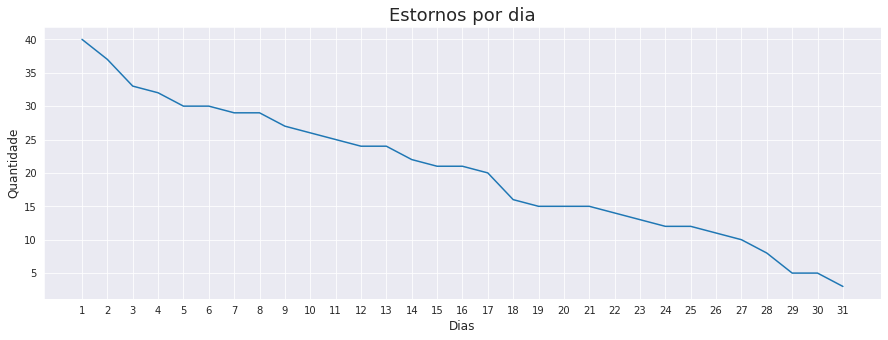

In [147]:
set_lineplot(dias, estornos_por_dia, "Dias", 'Quantidade', 'Estornos por dia')

### 4.3 Quantidade de estornos realizada por cada usuário (classificação)

In [148]:
motivos_por_usuario = pd.crosstab(dataset['usuario'], dataset['motivo'])
motivos_por_usuario = pd.DataFrame(motivos_por_usuario.stack().reset_index())
motivos_por_usuario.rename(columns = {0: 'total'}, inplace = True)
motivos_por_usuario.sort_values(by=['total'], ascending = False, inplace = True)

motivos_por_usuario

,usuario,motivo,total
9,CALOLIVEIRA,AUTORIZADO PELO GERENT,109
56,RFELIZ,ERRO DE LANÇAMENTO,99
65,RFREITAS,ERRO DE LANÇAMENTO,58
29,ECSOUSA,ERRO DE LANÇAMENTO,34
47,LPADOVINO,ERRO DE LANÇAMENTO,28
...,...,...,...
1,ANLGONCALVES,CORTESIA DE DIÁRIAS,0
37,IGPESSOA,CORTESIA DE DIÁRIAS,0
40,IGPESSOA,ERRO NA IMPRESSÃO,0
43,IGPESSOA,LCTO EM DUPLICIDADE,0


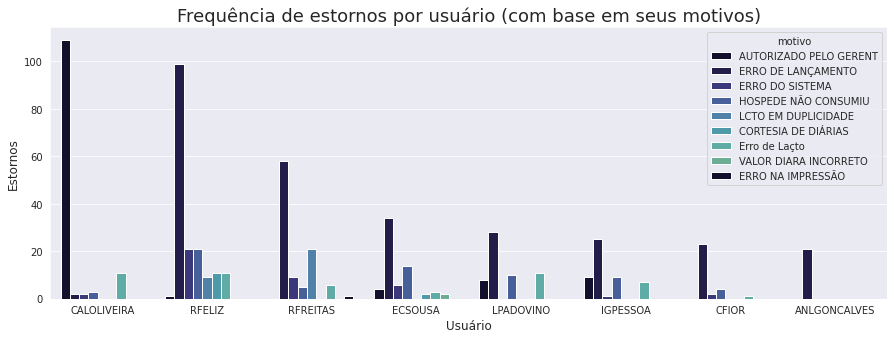

In [149]:
set_barplot('usuario', 'total', motivos_por_usuario, 
            'Usuário', 'Estornos', 
            'Frequência de estornos por usuário (com base em seus motivos)',
            hue = 'motivo')

### 4.4 Valor total de estornos por dia

In [150]:
valor_por_dia = dataset.groupby(['data'])['valor'].sum()

In [151]:
for i in range(0, len(valor_por_dia)):
  if valor_por_dia[i] <= 0:
    valor_por_dia[i] *= -1

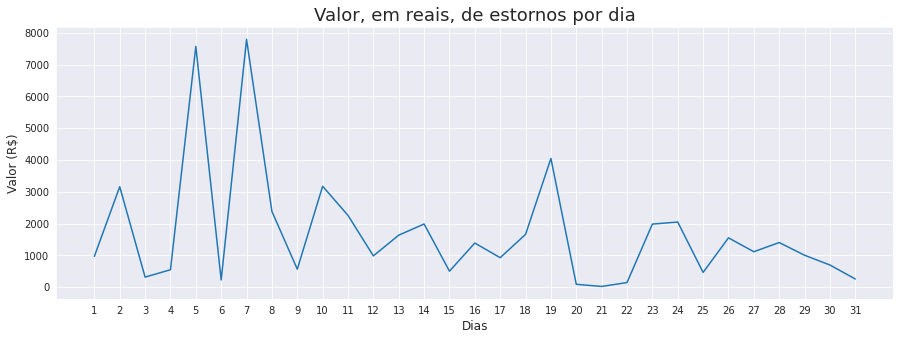

In [152]:
set_lineplot(dias, valor_por_dia, "Dias", 'Valor (R$)', 'Valor, em reais, de estornos por dia')